# SQL Queries for Movie Project

In [119]:
import mysql.connector 
from mysql.connector import errorcode
import config
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
#connecting to AWS DB instance 
db_name = "Movies"

cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.passwd,
    database = db_name
)

print(cnx)

In [121]:
cur = cnx.cursor()
print(cnx)

In [4]:
cur.execute("""SELECT * FROM top_movies_2018;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()


,name,rank,Domestic_Box_Office,Opening_Weekend
0,Black Panther,1,700059566,202003951
1,Avengers: Infinity War,2,678815482,257698183
2,Incredibles 2,3,608581744,182687905
3,Jurassic World: Fallen Kingdom,4,417719760,148024610
4,Aquaman,5,335061807,67873522


In [5]:
cur.execute("""SELECT * FROM top_movies_info;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
runtime_ds = df


In [6]:
runtime_ds.head()

,id,original_title,budget,vote_average,revenue,release_date,runtime,genre,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6
0,284054,Black Panther,200000000,7.4,1346739107,2018-02-13,134.0,Action,Adventure,Fantasy,Science Fiction,None,None,None
1,299536,Avengers: Infinity War,300000000,8.3,2046239637,2018-04-25,149.0,Adventure,Action,Science Fiction,None,None,None,None
2,260513,Incredibles 2,200000000,7.6,1241891456,2018-06-14,118.0,Action,Adventure,Animation,Family,None,None,None
3,351286,Jurassic World: Fallen Kingdom,170000000,6.5,1303459585,2018-06-06,129.0,Action,Adventure,Science Fiction,None,None,None,None
4,297802,Aquaman,160000000,6.8,1143689193,2018-12-07,144.0,Action,Adventure,Fantasy,None,None,None,None


In [200]:
runtime_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                100 non-null object
original_title    100 non-null object
budget            100 non-null int64
vote_average      100 non-null object
revenue           100 non-null int64
release_date      100 non-null datetime64[ns]
runtime           100 non-null int64
genre             100 non-null object
genre_1           91 non-null object
genre_2           63 non-null object
genre_3           24 non-null object
genre_4           5 non-null object
genre_5           1 non-null object
genre_6           1 non-null object
runtime_avg       100 non-null int64
release_month     100 non-null int64
dtypes: datetime64[ns](1), int64(5), object(10)
memory usage: 12.6+ KB


In [7]:
runtime_ds['runtime'] = runtime_ds['runtime'].astype('int')
runtime_ds['revenue'] = runtime_ds['revenue'].astype('int')
runtime_ds['budget'] = runtime_ds['budget'].astype('int')
runtime_ds['runtime_avg'] = runtime_ds['revenue']/runtime_ds['runtime']
runtime_ds['runtime_avg'] = runtime_ds['runtime_avg'].astype('int')
                                                             

In [8]:
# runtime_ds['runtime_avg'].mean()

1977611.03

In [9]:
runtime_profit = runtime_ds[runtime_ds['runtime_avg'] >= 1977611]

In [10]:
runtime_profit

,id,original_title,budget,vote_average,revenue,release_date,runtime,genre,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,runtime_avg
0,284054,Black Panther,200000000,7.4,1346739107,2018-02-13,134,Action,Adventure,Fantasy,Science Fiction,None,None,None,10050291
1,299536,Avengers: Infinity War,300000000,8.3,2046239637,2018-04-25,149,Adventure,Action,Science Fiction,None,None,None,None,13733151
2,260513,Incredibles 2,200000000,7.6,1241891456,2018-06-14,118,Action,Adventure,Animation,Family,None,None,None,10524503
3,351286,Jurassic World: Fallen Kingdom,170000000,6.5,1303459585,2018-06-06,129,Action,Adventure,Science Fiction,None,None,None,None,10104337
4,297802,Aquaman,160000000,6.8,1143689193,2018-12-07,144,Action,Adventure,Fantasy,None,None,None,None,7942286
5,383498,Deadpool 2,110000000,7.5,741547413,2018-05-10,121,Action,Comedy,Adventure,None,None,None,None,6128491
6,360920,The Grinch,75000000,6.4,508575295,2018-11-08,90,Animation,Family,Comedy,Fantasy,None,None,None,5650836
7,353081,Mission: Impossible - Fallout,178000000,7.3,791017452,2018-07-13,148,Action,Adventure,None,None,None,None,None,5344712
8,363088,Ant-Man and the Wasp,140000000,7.0,622674139,2018-07-04,119,Action,Adventure,Science Fiction,Comedy,None,None,None,5232555
9,424694,Bohemian Rhapsody,52000000,8.1,894027543,2018-10-24,135,Drama,Music,None,None,None,None,None,6622426


In [11]:
# runtime_ds['budget'].mean()

61817701.98

In [12]:
rev_and_runtime = runtime_profit[runtime_profit['budget'] <= 61817701]

In [13]:
# Possible Idea:  Takes above average $ amount / minute and compares it to below average budget.  
rev_and_runtime

,id,original_title,budget,vote_average,revenue,release_date,runtime,genre,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,runtime_avg
9,424694,Bohemian Rhapsody,52000000,8.1,894027543,2018-10-24,135,Drama,Music,None,None,None,None,None,6622426
10,332562,A Star Is Born,36000000,7.5,433888866,2018-10-03,135,Drama,Romance,Music,None,None,None,None,3213991
15,447332,A Quiet Place,17000000,7.3,340677200,2018-04-03,91,Horror,Drama,Science Fiction,None,None,None,None,3743705
26,439079,The Nun,22000000,5.6,365550119,2018-09-05,96,Horror,Mystery,Thriller,None,None,None,None,3807813
28,381719,Peter Rabbit,50000000,6.5,351266433,2018-02-07,93,Animation,Adventure,Family,None,None,None,None,3777058
33,337167,Fifty Shades Freed,55000000,6.2,368307760,2018-01-17,105,Drama,Romance,None,None,None,None,None,3507692
35,490132,Green Book,23000000,8.3,319700000,2018-11-16,130,Drama,Comedy,None,None,None,None,None,2459230


In [14]:
top_budget = rev_and_runtime['budget']
top_runtime = rev_and_runtime['runtime_avg']

In [15]:
avg_budget = runtime_ds['budget']
avg_runtime = runtime_ds['runtime_avg']

In [16]:
genre = runtime_ds.loc[:, 'genre':'genre_6']

In [17]:
# genre.head()

,genre,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6
0,Action,Adventure,Fantasy,Science Fiction,None,None,None
1,Adventure,Action,Science Fiction,None,None,None,None
2,Action,Adventure,Animation,Family,None,None,None
3,Action,Adventure,Science Fiction,None,None,None,None
4,Action,Adventure,Fantasy,None,None,None,None


In [18]:
genre_melt = genre.melt()
genre_melt.head()

,variable,value
0,genre,Action
1,genre,Adventure
2,genre,Action
3,genre,Action
4,genre,Action


In [19]:
gen_gen = genre_melt['value'].value_counts(normalize=True)
gen_gen

Comedy             0.126316
Action             0.115789
Adventure          0.108772
Drama              0.098246
Thriller           0.098246
Science Fiction    0.070175
Family             0.059649
Fantasy            0.059649
Crime              0.052632
Horror             0.052632
Mystery            0.042105
Romance            0.038596
Animation          0.035088
History            0.021053
Music              0.010526
War                0.007018
Documentary        0.003509
Name: value, dtype: float64

In [23]:
rev_and_runtime_genres = rev_and_runtime.loc[:, 'genre':'genre_6']
rev_and_runtime_genres_melt = rev_and_runtime_genres.melt()


In [46]:
gen_top = rev_and_runtime_genres_melt['value'].value_counts(normalize=True)
gen_top

Drama              0.277778
Horror             0.111111
Romance            0.111111
Music              0.111111
Animation          0.055556
Science Fiction    0.055556
Comedy             0.055556
Family             0.055556
Mystery            0.055556
Adventure          0.055556
Thriller           0.055556
Name: value, dtype: float64

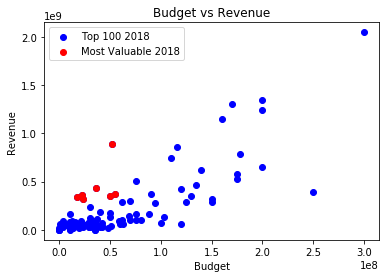

In [25]:
# top_budget = rev_and_runtime['budget']
# top_runtime = rev_and_runtime['runtime_avg']
# avg_budget = runtime_ds['budget']
# avg_runtime = runtime_ds['runtime_avg']

fig, ax = plt.subplots()
ax.scatter(runtime_ds['budget'], runtime_ds['revenue'], label='Top 100 2018', color='b')
ax.scatter(rev_and_runtime['budget'], rev_and_runtime['revenue'], label='Most Valuable 2018', color='r')

ax.set_xlabel('Budget')
ax.set_ylabel('Revenue')
ax.set_title('Budget vs Revenue')

ax.legend()



In [26]:
import seaborn as sns
sns.set()

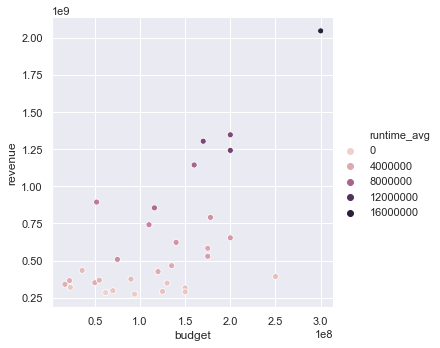

In [27]:
sns.relplot(x="budget", y="revenue", hue='runtime_avg',
            data=runtime_profit)
# col="time",
#             hue="smoker", style="smoker", size="size",

In [28]:
# rev_budget = runtime_ds.loc[:, ['revenue', 'budget', 'vote_average', 'runtime']]


In [29]:
# sns.pairplot(data=rev_budget, hue="budget");

In [62]:
### Catplot 
# sns.catplot(x="day", y="total_bill", hue="smoker",
#             kind="bar", data=tips);


genres_chart = pd.DataFrame(dict(gen_gen = gen_gen, gen_top = gen_top)).reset_index()
genres_chart

,index,gen_gen,gen_top
0,Action,0.115789,NaN
1,Adventure,0.108772,0.055556
2,Animation,0.035088,0.055556
3,Comedy,0.126316,0.055556
4,Crime,0.052632,NaN
5,Documentary,0.003509,NaN
6,Drama,0.098246,0.277778
7,Family,0.059649,0.055556
8,Fantasy,0.059649,NaN
9,History,0.021053,NaN


In [61]:
genres_chart.columns

Index(['variable', 'value'], dtype='object')

In [63]:
genres_chart_melt = pd.melt(genres_chart, id_vars=['index'], value_vars=['gen_gen', 'gen_top'])


In [64]:
genres_chart_melt

,index,variable,value
0,Action,gen_gen,0.115789
1,Adventure,gen_gen,0.108772
2,Animation,gen_gen,0.035088
3,Comedy,gen_gen,0.126316
4,Crime,gen_gen,0.052632
5,Documentary,gen_gen,0.003509
6,Drama,gen_gen,0.098246
7,Family,gen_gen,0.059649
8,Fantasy,gen_gen,0.059649
9,History,gen_gen,0.021053


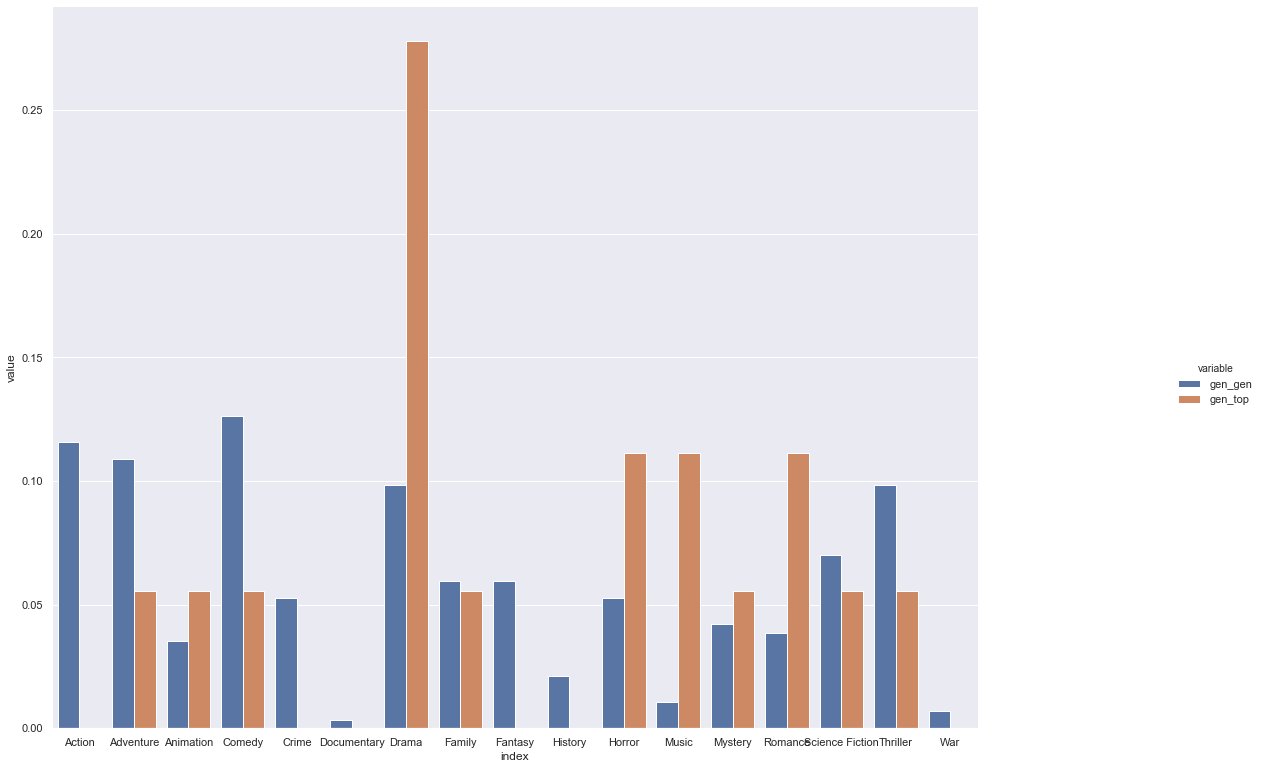

In [93]:

g_chart = sns.catplot(x="index", y="value", hue='variable',
            kind="bar", data=genres_chart_melt);
g_chart.fig.set_size_inches(20,12)

In [73]:
runtime_ds.head()

,id,original_title,budget,vote_average,revenue,release_date,runtime,genre,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,runtime_avg
0,284054,Black Panther,200000000,7.4,1346739107,2018-02-13,134,Action,Adventure,Fantasy,Science Fiction,None,None,None,10050291
1,299536,Avengers: Infinity War,300000000,8.3,2046239637,2018-04-25,149,Adventure,Action,Science Fiction,None,None,None,None,13733151
2,260513,Incredibles 2,200000000,7.6,1241891456,2018-06-14,118,Action,Adventure,Animation,Family,None,None,None,10524503
3,351286,Jurassic World: Fallen Kingdom,170000000,6.5,1303459585,2018-06-06,129,Action,Adventure,Science Fiction,None,None,None,None,10104337
4,297802,Aquaman,160000000,6.8,1143689193,2018-12-07,144,Action,Adventure,Fantasy,None,None,None,None,7942286


In [75]:
# test_chart = sns.catplot(x="revenue", y="budget", hue='vote_average',
#             kind="bar", data=runtime_ds);

In [84]:
runtime_ds['release_month'] = pd.DatetimeIndex(df['release_date']).month
runtime_ds.head()

,id,original_title,budget,vote_average,revenue,release_date,runtime,genre,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,runtime_avg,release_month
0,284054,Black Panther,200000000,7.4,1346739107,2018-02-13,134,Action,Adventure,Fantasy,Science Fiction,None,None,None,10050291,2
1,299536,Avengers: Infinity War,300000000,8.3,2046239637,2018-04-25,149,Adventure,Action,Science Fiction,None,None,None,None,13733151,4
2,260513,Incredibles 2,200000000,7.6,1241891456,2018-06-14,118,Action,Adventure,Animation,Family,None,None,None,10524503,6
3,351286,Jurassic World: Fallen Kingdom,170000000,6.5,1303459585,2018-06-06,129,Action,Adventure,Science Fiction,None,None,None,None,10104337,6
4,297802,Aquaman,160000000,6.8,1143689193,2018-12-07,144,Action,Adventure,Fantasy,None,None,None,None,7942286,12


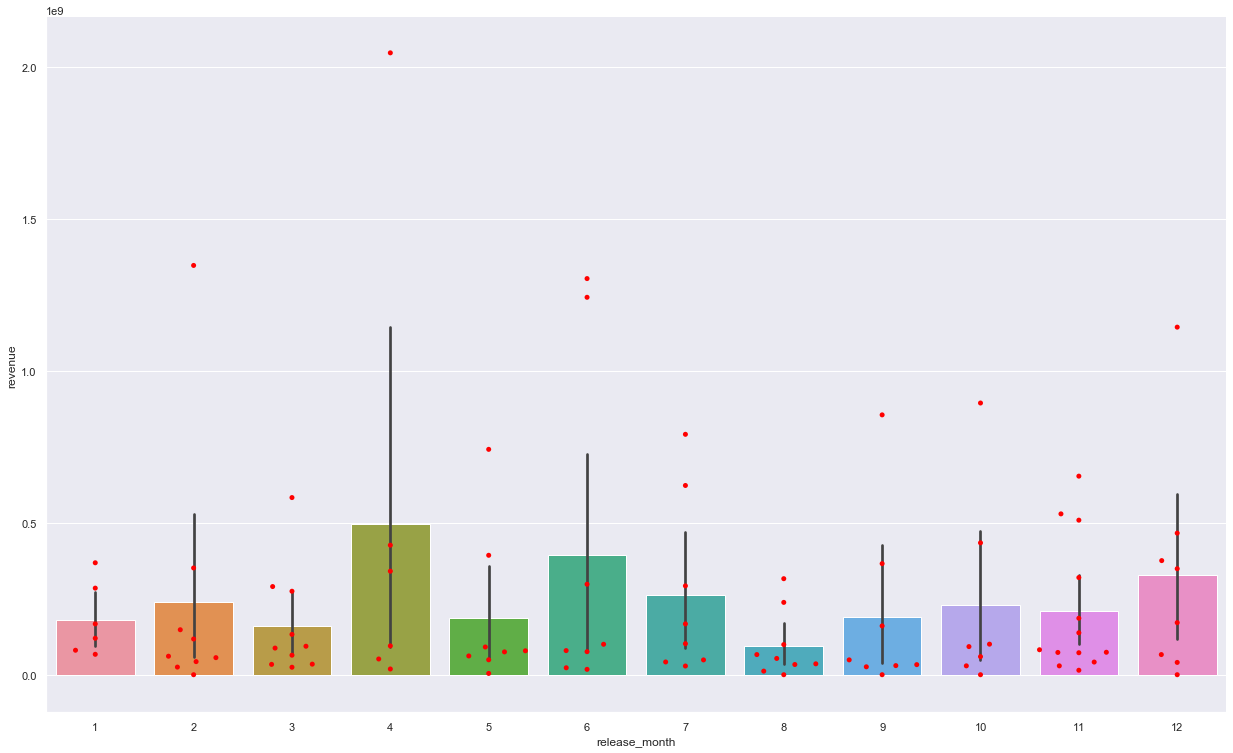

In [117]:
test_chart = sns.catplot(x="release_month", y="revenue",
            kind="bar", data=runtime_ds);
text_chart = sns.swarmplot(x="release_month", y="revenue", data=runtime_ds, color="red")

test_chart.fig.set_size_inches(20,12)

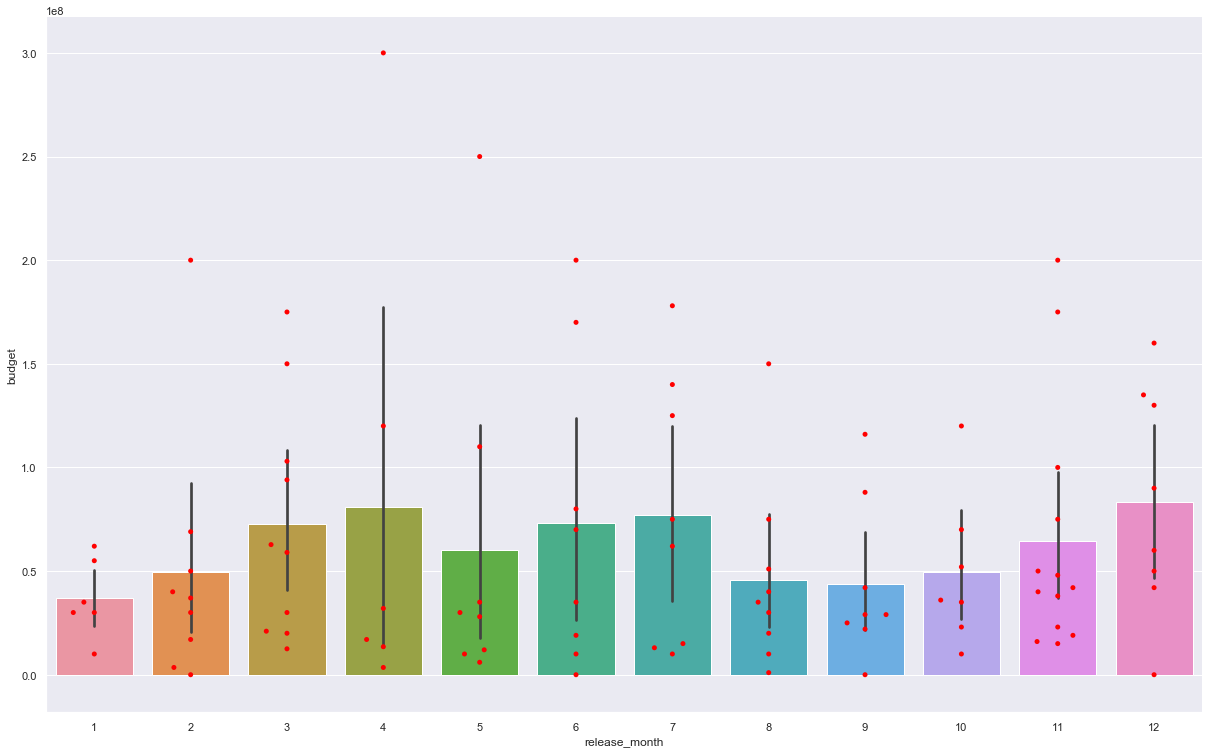

In [112]:
test1_chart = sns.catplot(x="release_month", y="budget",
            kind="bar", data=runtime_ds);
text1_chart = sns.swarmplot(x="release_month", y="budget", data=runtime_ds, color="red")
test1_chart.fig.set_size_inches(20,12)

In [173]:

cur.execute("""SELECT * FROM Movies.top_movies_2018;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
top_20 = df.head(10)
top_20

,name,rank,Domestic_Box_Office,Opening_Weekend
0,Black Panther,1,700059566,202003951
1,Avengers: Infinity War,2,678815482,257698183
2,Incredibles 2,3,608581744,182687905
3,Jurassic World: Fallen Kingdom,4,417719760,148024610
4,Aquaman,5,335061807,67873522
5,Deadpool 2,6,324591735,125507153
6,The Grinch,7,270620950,67572855
7,Mission: Impossible - Fallout,8,220159104,61236534
8,Ant-Man and the Wasp,9,216648740,75812205
9,Bohemian Rhapsody,10,216303339,51061119


In [174]:
top_20["Domestic_Box_Office"] = top_20["Domestic_Box_Office"].astype('int')
top_20['Opening_Weekend'] = top_20['Opening_Weekend'].astype('int')

/Users/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [175]:
top_20_chart_melt = pd.melt(top_20, id_vars=['name'], value_vars=['Domestic_Box_Office', 'Opening_Weekend'])
top_20_chart_melt.head(5)

,name,variable,value
0,Black Panther,Domestic_Box_Office,700059566
1,Avengers: Infinity War,Domestic_Box_Office,678815482
2,Incredibles 2,Domestic_Box_Office,608581744
3,Jurassic World: Fallen Kingdom,Domestic_Box_Office,417719760
4,Aquaman,Domestic_Box_Office,335061807


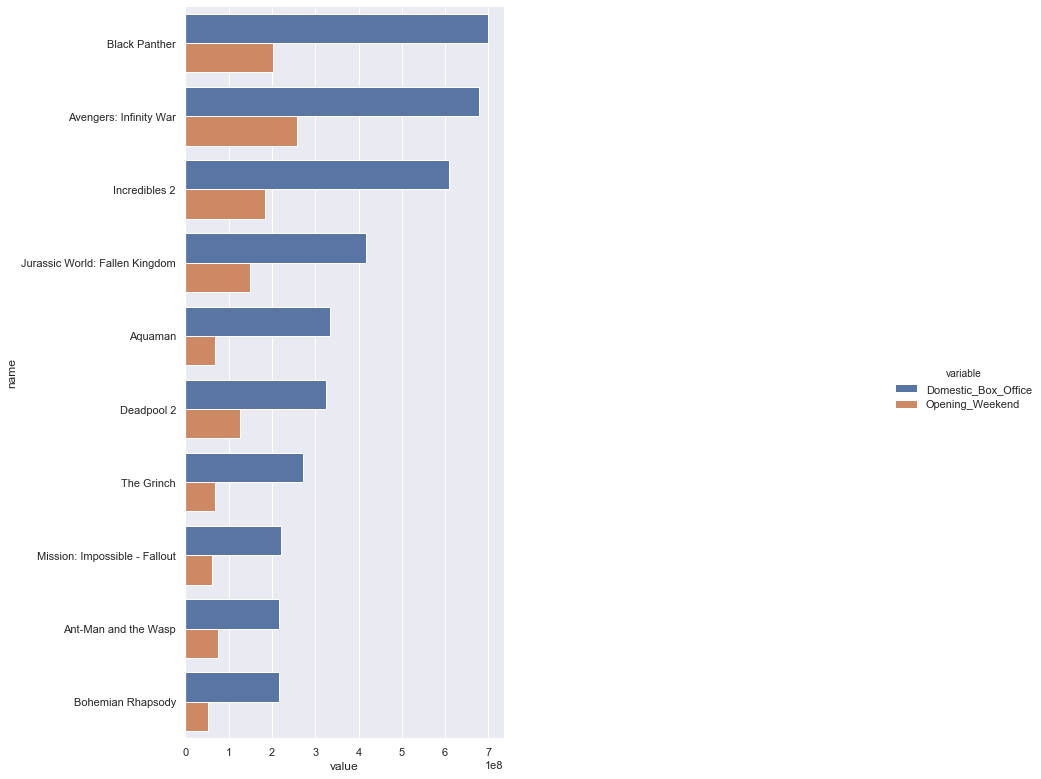

In [176]:
top_20_chart = sns.catplot(x="value", y="name", hue='variable',
                    
            kind="bar", data=top_20_chart_melt);
top_20_chart.fig.set_size_inches(25,12)

In [185]:
top_20['vote_average'] = runtime_ds['vote_average'].astype('float')

/Users/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [186]:
top_20.head(1)

,name,rank,Domestic_Box_Office,Opening_Weekend,vote_average
0,Black Panther,1,700059566,202003951,7.4


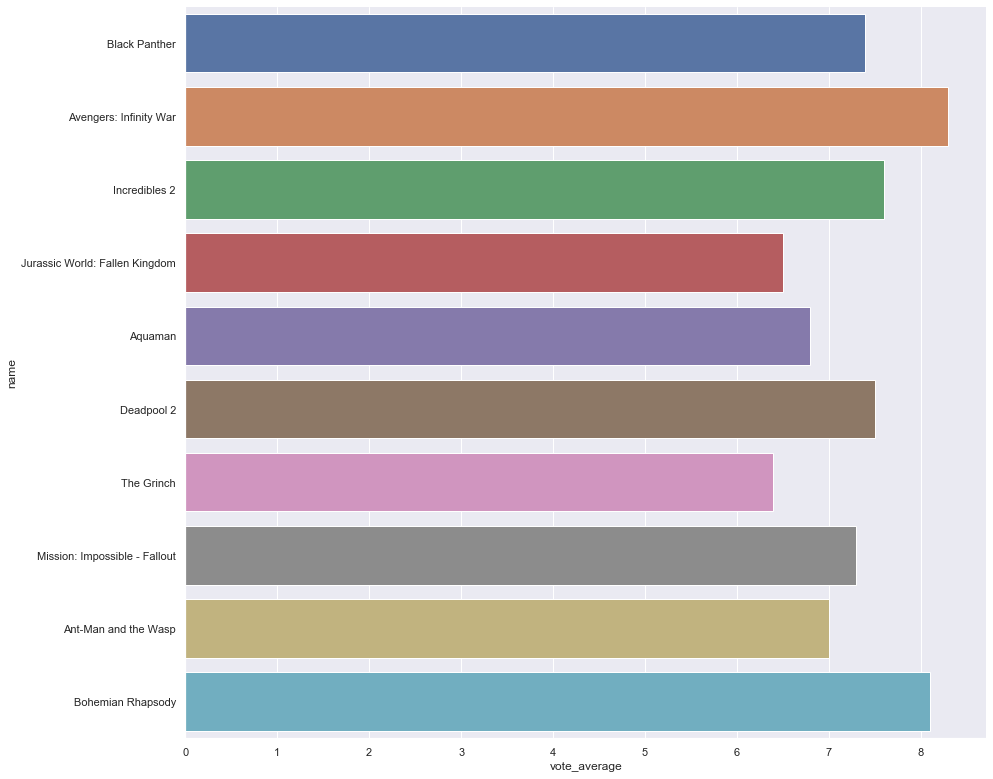

In [187]:
top_20_chart_vote = sns.catplot(x="vote_average", y="name",
                    
            kind="bar", data=top_20);
top_20_chart_vote.fig.set_size_inches(25,12)